Explore the data.
Use publication information (abstracts titles etc.) to add what features seem useful

In [6]:
#All imports
import pandas as pd
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import statsmodels.api as sm
import sklearn

In [7]:
df = pd.read_pickle('HealthgradesNymagClean.pkl')
df.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,specialistDesc,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,isbest
fullname,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",96.0,10.0,10.0,36.0,23.0,False
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",96.0,10.0,10.0,16.0,55.0,False
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",88.0,9.0,9.0,14.0,19.0,False
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,"[Oncology Specialist, Hematology Specialist, I...",70.0,7.0,7.0,10.0,32.0,True
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",100.0,10.0,10.0,8.0,36.0,False


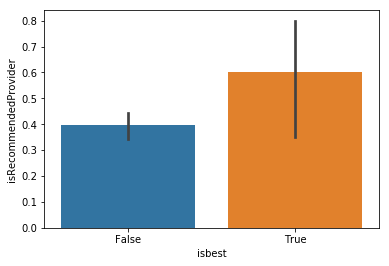

In [15]:
#Is there a difference in isRecommendedProvider of doctors (Yes)
sns.barplot(x = df.isbest, y = df.isRecommendedProvider)

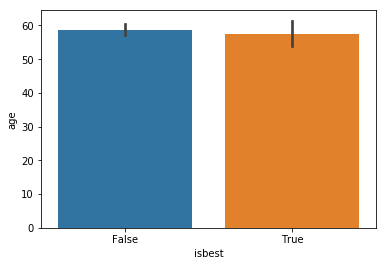

In [16]:
#Is there a difference in age of doctors (NO)
sns.barplot(x = df.isbest, y = df.age)

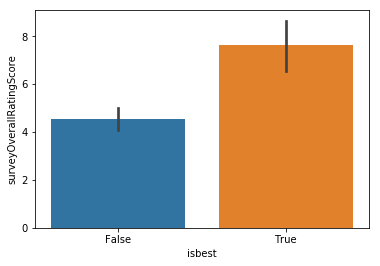

In [17]:
#Is there a difference in surveyOverallRatingScore of doctors (Yes)
sns.barplot(x = df.isbest, y = df.surveyOverallRatingScore)

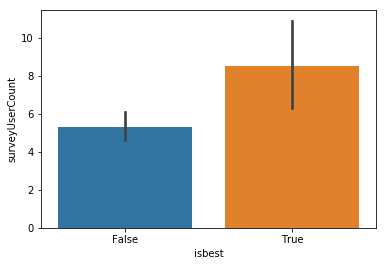

In [18]:
#Is there a difference in surveyUserCount of doctors (Yes), seems related to previous
sns.barplot(x = df.isbest, y = df.surveyUserCount)

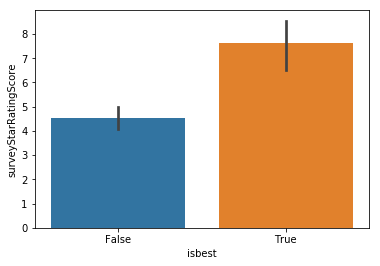

In [19]:
#is there a difference in surveyStarRatingScore
sns.barplot(x = df.isbest, y = df.surveyStarRatingScore)
#this is probably correlated to other survey metrics, so should check for correlations

Number of nan = 0


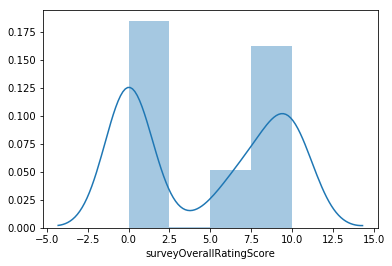

In [20]:
#plot overall ratings and count nan
countnan = 0
ratings = []
for rating in df.surveyOverallRatingScore:
    if pd.isnull(rating): countnan+=1
    else:ratings.append(rating)
ratings = pd.Series(ratings, name = 'surveyOverallRatingScore')
sns.distplot(ratings)
print('Number of nan = '+ str(countnan))
#the 0 ratings are probably converted from nan for other columns. This may be useful to include in the fit

Number of nan = 175


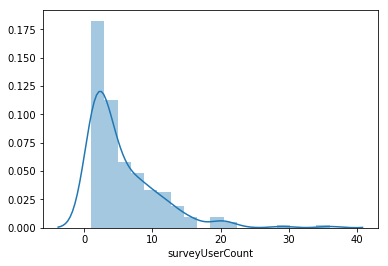

In [21]:
#plot overall surveyUserCount and count nan since this showed difference between "is best" and not"
countnan = 0
ratings = []
for rating in df.surveyUserCount:
    if pd.isnull(rating): countnan+=1
    else:ratings.append(rating)
ratings = pd.Series(ratings, name = 'surveyUserCount')
sns.distplot(ratings)
print('Number of nan = '+ str(countnan))
#too many nan will not use

Number of nan = 0


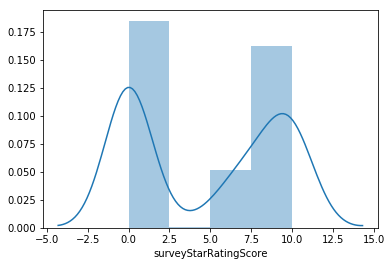

In [22]:
#plot overall surveyStarRatingScore and count nan
countnan = 0
ratings = []
for rating in df.surveyStarRatingScore:
    if pd.isnull(rating): countnan+=1
    else:ratings.append(rating)
ratings = pd.Series(ratings, name = 'surveyStarRatingScore')
sns.distplot(ratings)
print('Number of nan = '+ str(countnan))
#no nan, check for correlations

In [23]:
#check number of publications, this is from pubmed and not healthgrades
sns.barplot(x = df.isbest, y = df.Number_pub)

AttributeError: 'DataFrame' object has no attribute 'Number_pub'

Number of nan = 0


/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


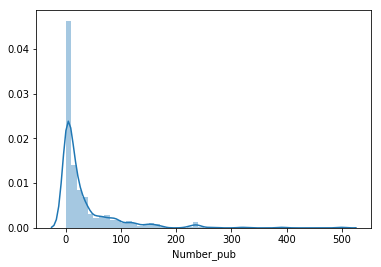

In [121]:
#check distribution of number of publications
countnan = 0
ratings = []
for rating in df.Number_pub:
    if pd.isnull(rating): countnan+=1
    else:ratings.append(rating)
ratings = pd.Series(ratings, name = 'Number_pub')
sns.distplot(ratings)
print('Number of nan = '+ str(countnan))
#no nan, check for correlations

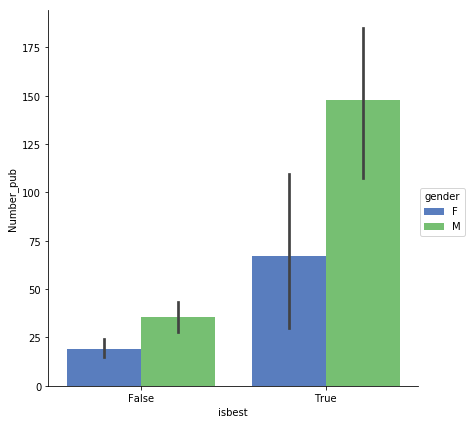

In [9]:
#check gender
sns.factorplot(x="isbest", y="Number_pub",hue = 'gender', data=df, size=6, kind="bar", palette="muted")

So far interesting columns seem to be: surveyStarRatingScore, surveyOverallRatingScore, number_pub, isRecommendedProvider

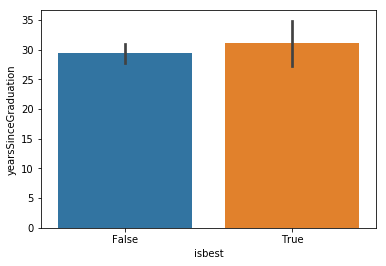

In [36]:
sns.barplot(x = df.isbest, y = df.yearsSinceGraduation)

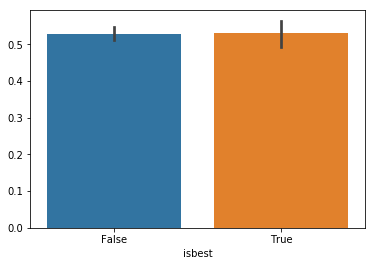

In [37]:
sns.barplot(x = df.isbest, y = df.yearsSinceGraduation/df.age)

In [69]:
specialties = []
for desc in df.specialistDesc:
    for specialty in desc:
        if not specialty in specialties:
            specialties.append(specialty)

In [70]:
specialties

['Oncology Specialist',
 'Hematology Specialist',
 'Internist',
 'Emergency Medicine Specialist',
 'Geriatrician',
 'Dermatologist',
 'Hepatology Specialist',
 'Gynecologic Oncology Specialist',
 'Hospice & Palliative Medicine Specialist',
 'Diagnostic Radiologist',
 'Nephrology Specialist',
 'Other Provider',
 'Radiation Oncology Specialist',
 'Radiologist',
 'Infectious Disease Specialist',
 'Blood Banking & Transfusion Medicine Specialist',
 'Allergy & Immunology Specialist',
 'Rheumatology Specialist']

So far interesting columns seem to be: surveyStarRatingScore, surveyOverallRatingScore, number_pub, isRecommendedProvider

In [149]:
#create new df with only relevant columns. check for correlations
columnnames = []
for columnname in df: columnnames.append(columnname)
del(columnnames[-2:])
del(columnnames[-5:-3])
del(columnnames[6])
columnnames

['aboutMe',
 'address.line1',
 'address.line2',
 'affiliatedHospitalIDs',
 'age',
 'gender',
 'payorCount',
 'premiumDisplayOasLabel',
 'providerSponsorships',
 'specialistDesc',
 'surveyOverallRatingPercent',
 'surveyUserCount',
 'yearsSinceGraduation',
 'fullname']

In [150]:
df_tofit = df.drop(columns = columnnames)

In [151]:
df_tofit
#Y/output is isbest

,isRecommendedProvider,surveyOverallRatingScore,surveyStarRatingScore,isbest,Number_pub
displayName,,,,,
"Dr. Sylvia Adams, MD",True,10.0,10.0,False,36
"Dr. Morton Coleman, MD",True,10.0,10.0,False,90
"Dr. Karen Haglof, MD",True,9.0,9.0,False,1
"Dr. Michael Grossbard, MD",False,7.0,7.0,True,39
"Dr. Jeffrey Tepler, MD",True,10.0,10.0,False,1
"Dr. Francisco Esteva, MD",True,10.0,10.0,False,145
"Dr. Cynthia Leichman, MD",True,10.0,10.0,False,17
"Dr. Vicky Makker, MD",True,10.0,10.0,False,20
"Dr. Daniel Cho, MD",True,10.0,10.0,False,34


In [152]:
df_toplot = df_tofit.drop(columns = ['isbest','isRecommendedProvider'])

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


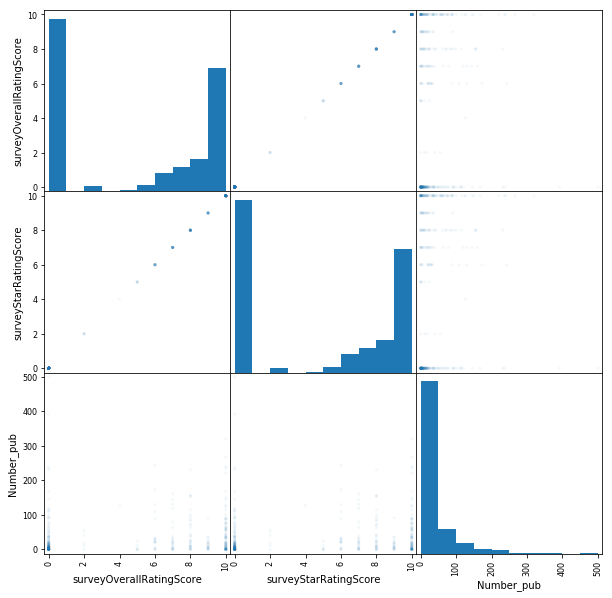

In [153]:
#check for correlations
a = pd.scatter_matrix(df_toplot,alpha=0.05,figsize=(10,10), diagonal='hist')

As expected OverallRatingScore and StarRatingScore are correlated, drop one of these and fit a logistic regression